# IoT Network Traffic Management Models Evaluation

This notebook evaluates machine learning models for detecting anomalies in IoT network traffic for different devices: Archer, Camera, and Indoor. The evaluation includes loading pre-trained models, predicting on test datasets, and generating performance metrics, including accuracy and classification reports.


## Importing required libraries

In [5]:

import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical


## Paths to Datasets and Models

The following paths are defined for the feature-selected datasets and the saved models for each device.


In [6]:
# Paths to the feature-selected datasets
selected_file_paths = {
    'archer': r'C:\Users\USER\IoT_Network_Traffic_Management\data\feature\selected_archer.csv',
    'camera': r'C:\Users\USER\IoT_Network_Traffic_Management\data\feature\selected_camera.csv',
    'indoor': r'C:\Users\USER\IoT_Network_Traffic_Management\data\feature\selected_indoor.csv'
}

# Paths to the saved models
model_paths = {
    'archer': r'C:\Users\USER\IoT_Network_Traffic_Management\models\IOT_Archer_model.h5',
    'camera': r'C:\Users\USER\IoT_Network_Traffic_Management\models\IOT_Camera_model.h5',
    'indoor': r'C:\Users\USER\IoT_Network_Traffic_Management\models\IOT_Indoor_model.h5'
}


## Data Loading and Preprocessing

This section contains a function to load the dataset for each device and preprocess it for model evaluation.


In [7]:
# Function to load and preprocess data
def load_data(device_name):
    df = pd.read_csv(selected_file_paths[device_name])
    X = df.drop(columns=['label']).values  # Features
    y = df['label'].values  # Target
    
    # Standardize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    # Reshape X for CNN-LSTM (samples, timesteps, features)
    X = X.reshape((X.shape[0], 1, X.shape[1]))
    
    # One-hot encode target labels for CNN-LSTM
    y = to_categorical(y)
    
    return train_test_split(X, y, test_size=0.3, random_state=42)


## Model Evaluation

This section includes a function to evaluate the models, which involves loading the model, making predictions, and generating performance metrics.


In [8]:
# Function to evaluate the trained model
def evaluate_model(device_name, X_test, y_test):
    # Load the saved model
    model = load_model(model_paths[device_name])

    # Predict the classes on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Convert one-hot encoded y_test back to class labels
    y_test_classes = np.argmax(y_test, axis=1)

    # Calculate accuracy
    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    print(f'Accuracy for {device_name.capitalize()} model: {accuracy:.4f}')

    # Generate classification report
    class_report = classification_report(y_test_classes, y_pred_classes, output_dict=True)

    # Print classification report with four decimal places for the indoor model
    if device_name == 'indoor':
        print("Classification Report for Indoor Model:")
        print(f"{'Class':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10} {'Support':<10}")
        for label, metrics in class_report.items():
            if isinstance(metrics, dict):  # Only for class labels, skip 'accuracy', 'macro avg', etc.
                print(f"{label:<10} {metrics['precision']:.4f} {metrics['recall']:.4f} {metrics['f1-score']:.4f} {metrics['support']:<10}")
        print("\n")
    else:
        print(f'Classification Report for {device_name.capitalize()} model:\n{classification_report(y_test_classes, y_pred_classes)}')

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=np.unique(y_test_classes), 
                yticklabels=np.unique(y_test_classes))
    plt.title(f'Confusion Matrix for {device_name.capitalize()} Model')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f'IOT_{device_name.capitalize()}_confusion_matrix.png')  # Save the plot
    plt.show()


## Model Evaluation Summary

We will evaluate the models for each device: Archer, Camera, and Indoor. The evaluation includes accuracy metrics and classification reports.


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step
Accuracy for Camera model: 0.6022
Classification Report for Camera model:
              precision    recall  f1-score   support

           0       0.58      0.64      0.61       351
           1       0.62      0.57      0.59       368

    accuracy                           0.60       719
   macro avg       0.60      0.60      0.60       719
weighted avg       0.60      0.60      0.60       719



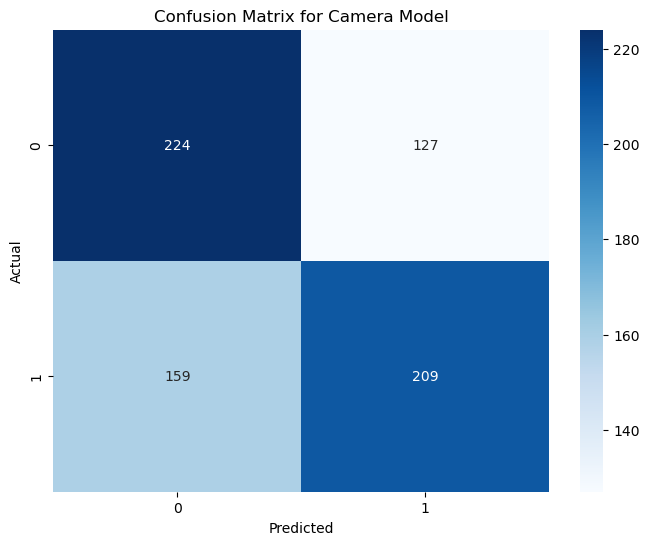

938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step
Accuracy for Archer model: 0.9065
Classification Report for Archer model:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     14966
           1       1.00      0.81      0.90     15034

    accuracy                           0.91     30000
   macro avg       0.92      0.91      0.91     30000
weighted avg       0.92      0.91      0.91     30000



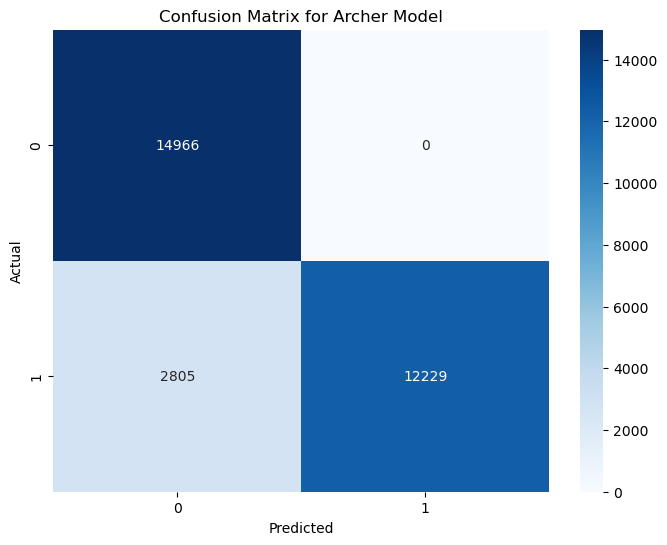

938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step
Accuracy for Indoor model: 0.9999
Classification Report for Indoor Model:
Class      Precision  Recall     F1-Score   Support   
0          0.9998 1.0000 0.9999 14967.0   
1          1.0000 0.9998 0.9999 15033.0   
macro avg  0.9999 0.9999 0.9999 30000.0   
weighted avg 0.9999 0.9999 0.9999 30000.0   




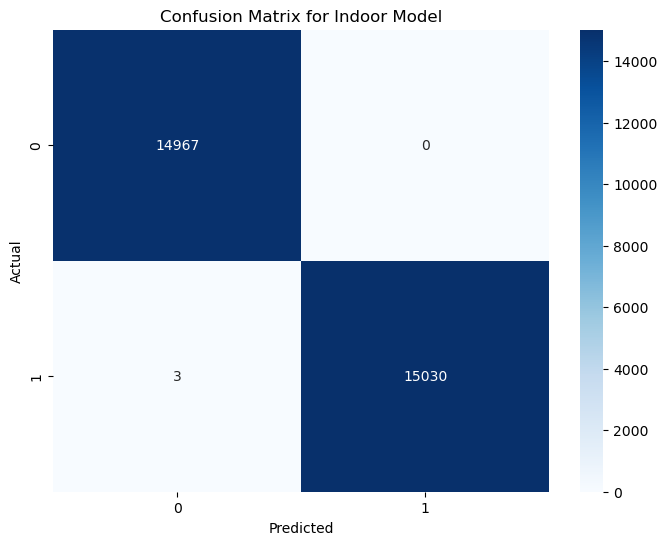

In [9]:
# Evaluate models for each device
for device in ['camera', 'archer', 'indoor']:
    # Load and preprocess data for each device
    X_train, X_test, y_train, y_test = load_data(device)
    
    # Evaluate the loaded models
    evaluate_model(device, X_test, y_test)
